# Modelo SIR

Es un modelo epidemiológico que divide a una población constante en tres categorias. Los individuos pueden separarse en
- $S$  _susceptibles_ a contagiarse una enfermedad,
- $I$  _infectados_ por la misma,
- $R$ _recuperados_ luego de haber estado _infectados

Los individios pueden migrar entre categorías por tazas de transferencia.
- $ S \rightarrow I $ por la taza de infección $ \gamma $
- $ I \rightarrow R $ por la taza de recuperación $\beta$

Por lo tanto, las variaciones de individuos en cada categoría pueden escribirse en forma diferencial:

$$ 
\begin{cases}
  \frac{\partial S}{\partial t} &= -\gamma S \times I \\
  \frac{\partial I}{\partial t} &= \gamma S \times I  - \beta I  \\
  \frac{\partial R}{\partial t} &= \beta I  
\end{cases}
$$

para cada uno de las derivadas podemos escribir los cocientes incrementales, por ejemplo para $S$:

$$  S_i  = S_{i-1} + \delta t \left( - \gamma S_{i-1} \times I_{i-1} \right)  $$

Pero por ejemplo ( y esto será una filosofía constante de la materia) podemos poner las tres funciones Incógnita , $ S(t), I(t),  R(t)  $ en un Vector:

$$ SIR = \left( \matrix{ S \\ I \\ R} \right) $$

uego podemos poner las derivadas del vector $SIR$:

$$ 
\frac{\partial SIR}{\partial t} = F(t, SIR)  = 
\left( \matrix{ -\gamma SIR_1 \times SIR_2 \\
\gamma SIR_1 \times SIR_2 - \beta SIR_2 \\
\beta SIR_2}
\right) 
$$

donde el subíndice indica la componte del vector SIR.

Por otro lado, tenemos que la función característica de la ecuación, $F(t, SIR)$, puede usarse para aplicar cualquiera de los métodos vistos. Por ejemplo para el método de _Euler_ :

$$  SIR^{i+1}   = SIR^{i} +  \delta t F (t^{i}, SIR^{i} ) $$

 donde  el supra índice indica el paso temporal

# Implementación

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import DFSOLVE as dflib # DFSOLVE es el módulo que tiene mis solvers Runge-Kutta, Euler y Heunn
# from importlib.machinery import SourceFileLoader # Source File Loader permite importar módulos de forma dinámica: pueden 
# recargarse sin necesidad de reiniciar el Kernel
# dflib = SourceFileLoader('dflib', 'DFSOLVE.py').load_module()

plt.rc('figure',figsize=(15,10))
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend',fontsize=20)
plt.rc('lines',linewidth=5, markersize=10)

In [2]:
def funcionv(t, _Y, gamma=0.35, beta=0.1):
    """
    Parámetros
    ==========
    Y = [S, I, R]
    """
    _Y = _Y.ravel()
    _dY = [ 
            -gamma*_Y[1]*_Y[0],
            gamma*_Y[1]*_Y[0]-beta*_Y[1],
            beta*_Y[1]
        ]
    Salida = np.array(_dY).reshape(-1,1)
    return Salida

In [3]:
t = np.linspace(0,100, 1000)
dt = np.diff(t)
SIR0 = np.array( [[0.9],  [0.1] , [0.0]]) # = [ S0, I0, R0]

In [4]:
def simulacion(_gamma, _beta, _Y0):
    _Y = _Y0.copy()
#    _gamma = 0.9 # tasa de contagios
#    _beta = 0.01 # tasa de recuperaciion
    newfunv = lambda t, sir: funcionv(t, sir, gamma = _gamma, beta = _beta)
    for i, _dt in enumerate(dt):
        _Y = np.hstack((
            _Y,
            dflib.paso_RK(_dt, t[i], _Y[:,-1].reshape(-1,1), newfunv))
        )
    return _Y

Text(0.5, 0.9, 'gamma / beta  = 3.5000')

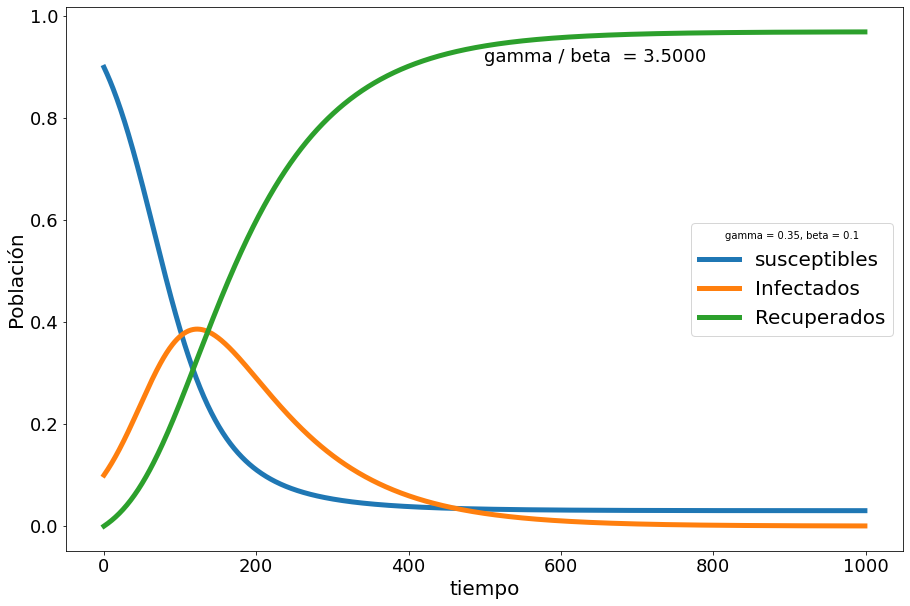

In [5]:
_gamma = 0.35
_beta = 0.1
SIR10=simulacion(_gamma, _beta, SIR0)
plt.plot(SIR10[0,:], label='susceptibles')
plt.plot(SIR10[1,:], label='Infectados')
plt.plot(SIR10[2,:],label='Recuperados')
plt.ylabel('Población')
plt.xlabel('tiempo')
plt.legend(title='gamma = {}, beta = {}'.format(_gamma, _beta))
plt.annotate('gamma / beta  = {:.4f}'.format(_gamma / _beta)
             , xy=(0.5, 0.9), xycoords='axes fraction', fontsize=18)

In [6]:
_gamma = 0.35
_beta = 0.01
SIR20=simulacion(_gamma, _beta, SIR0)

Text(0.5, 0.9, 'gamma / beta  = 35.0000')

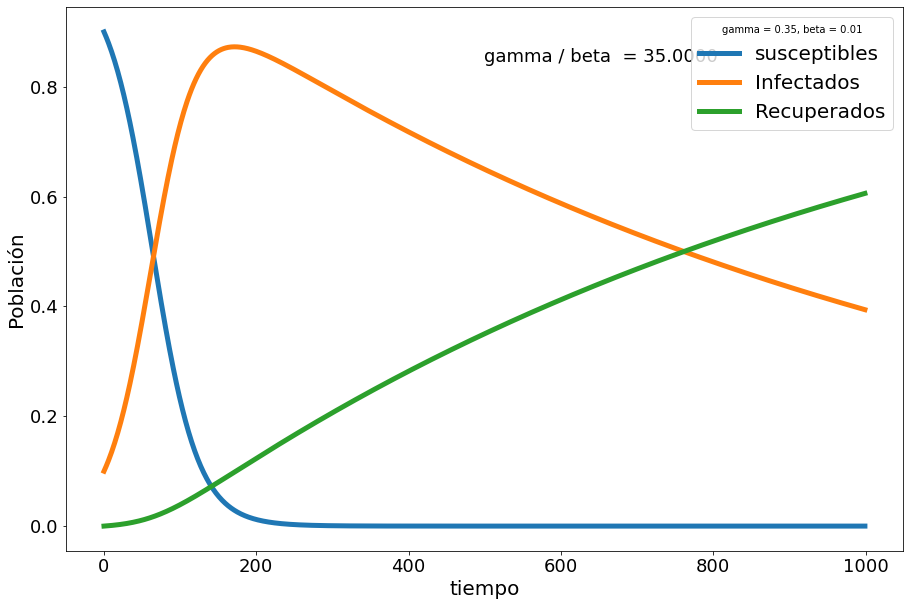

In [7]:
plt.plot(SIR20[0,:], label='susceptibles')
plt.plot(SIR20[1,:], label='Infectados')
plt.plot(SIR20[2,:],label='Recuperados')
plt.ylabel('Población')
plt.xlabel('tiempo')

plt.legend(title='gamma = {}, beta = {}'.format(_gamma, _beta))
plt.annotate('gamma / beta  = {:.4f}'.format(_gamma / _beta)
             , xy=(0.5, 0.9), xycoords='axes fraction', fontsize=18)

Text(0.5, 0.9, 'gamma / beta  = 0.3500')

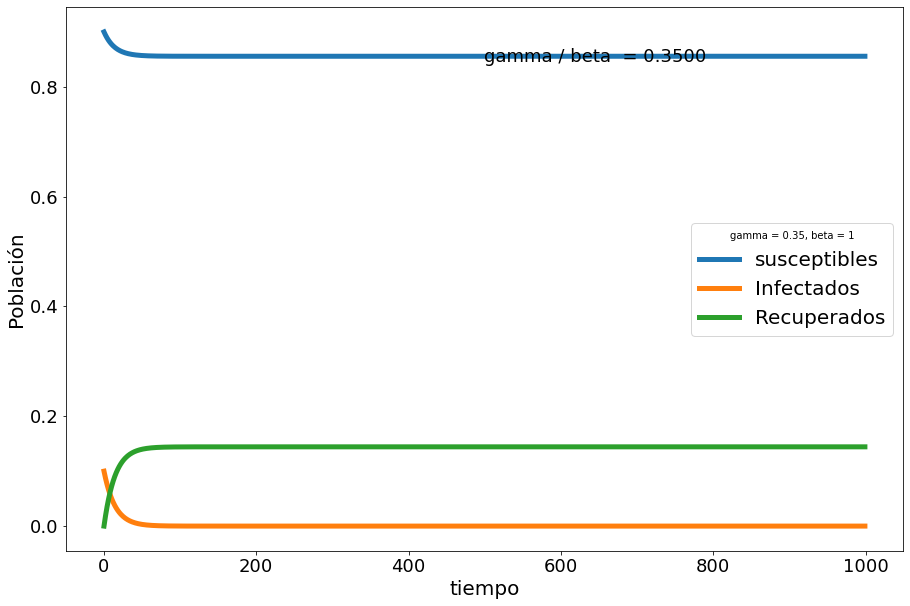

In [8]:
_gamma = 0.35
_beta = 1 
SIR30=simulacion(_gamma, _beta, SIR0)
plt.plot(SIR30[0,:], label='susceptibles')
plt.plot(SIR30[1,:], label='Infectados')
plt.plot(SIR30[2,:],label='Recuperados')
plt.ylabel('Población')
plt.xlabel('tiempo')
plt.legend(title='gamma = {}, beta = {}'.format(_gamma, _beta))
plt.annotate('gamma / beta  = {:.4f}'.format(_gamma / _beta)
             , xy=(0.5, 0.9), xycoords='axes fraction', fontsize=18)